<a href="https://colab.research.google.com/github/AnHaiTrinh/handson-ml/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from scipy.stats import mode
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris['data'][:, 2:]
y = iris['target']

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

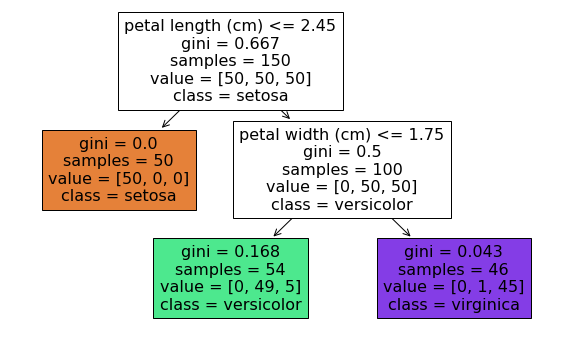

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
plt.figure(figsize=(10, 6))
plot_tree(tree_clf,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          filled=True)

In [4]:
tree_clf.predict([[5, 1.5]])

array([1])

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

Text(0, 0.5, 'y')

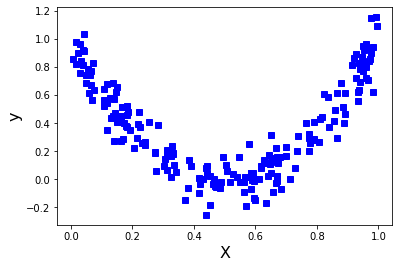

In [6]:
X = np.random.rand(200, 1)
y = 4 * (X - 0.5) ** 2 + 0.1 * np.random.randn(200, 1)

plt.plot(X, y, 'bs')
plt.xlabel('X', fontsize=16)
plt.ylabel('y', fontsize=16)

In [7]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

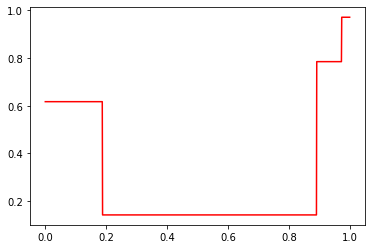

In [8]:
X_new = np.linspace(0, 1, 1000).reshape(-1, 1)
y_pred = tree_reg.predict(X_new)
plt.plot(X_new, y_pred, 'r-')

In [9]:
moons = datasets.make_moons(n_samples=10000, noise=0.4)
X = moons[0]
y = moons[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'max_depth': list(range(2, 10))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
best_tree_reg = grid_search_cv.best_estimator_
best_tree_reg

Fitting 3 folds for each of 2352 candidates, totalling 7056 fits


DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12)

In [10]:
y_pred = best_tree_reg.predict(X_test)
print('Decision Tree accuracy score:', accuracy_score(y_test, y_pred))

Decision Tree accuracy score: 0.8545


In [11]:
n_trees = 1000
n_instances = 100
training_sets = []
rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train)-n_instances)
for mini_train_idx, mini_test_idx in rs.split(X_train):
    X_mini_train = X_train[mini_train_idx]
    y_mini_train = y_train[mini_train_idx]
    training_sets.append((X_mini_train, y_mini_train))

In [12]:
forest = [clone(best_tree_reg) for _ in range(n_trees)]
accuracy = []

In [13]:
for model, (X_mini_train, y_mini_train) in zip(forest, training_sets):
    model.fit(X_mini_train, y_mini_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

In [14]:
np.mean(accuracy)

0.8117885

In [15]:
Y_pred = np.empty((n_trees, len(X_test)), dtype=np.uint8)
for idx, tree in enumerate(forest):
    Y_pred[idx] = tree.predict(X_test)

In [16]:
y_pred_majority_votes, _ = mode(Y_pred, axis=0)
print('Forest acurracy score:', accuracy_score(y_test, y_pred_majority_votes.reshape(-1, 1)))

Forest acurracy score: 0.8665
